# Lecture 3 Ideas

## Topics we still need to cover
 - API for USDA data
 - API for weather data
 - Mapping
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

## Useful places

<a href="https://public.opendatasoft.com/explore/dataset/cities-and-towns-of-the-united-states/table/" target="_blank">opendatasoft</a>

<a href="https://realpython.com/python-api/" target="_blank">Python and APIs</a>

<a href="https://quickstats.nass.usda.gov/api" target="_blank">USDA Quick Stats API</a>

<a href="https://github.com/oats-center/notebooks" target="_blank">Purdue OATS Center Notebooks</a>



In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import requests

# Uses python's string format method.
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('Lab2Data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/jovyan
Current working directory: /home/jovyan/Lab2Data


## Simple Mapping?

In [2]:
my_file_name = 'cities-and-towns-of-the-united-states.csv'
my_new_file_name = 'Wrangled-' + my_file_name

# Open the file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line

print(line)
fields = line.split(';')
print(len(fields))
print(fields)
print()

for i in range(20):
    line = fin.readline()
    fields = line.split(';')
    print(len(fields))
    print(fields)
    print()

fin.close()

Geo Point;Geo Shape;GNIS ID;ANSICODE;FEATURE;FEATURE2;NAME;POP 2010;COUNTY;COUNTY FIPS;STATE;STATE FIPS;LATITUDE;LONGITUDE;PopPlLat;PopPlLong;ELEV IN M;ELEV IN FT

18
['Geo Point', 'Geo Shape', 'GNIS ID', 'ANSICODE', 'FEATURE', 'FEATURE2', 'NAME', 'POP 2010', 'COUNTY', 'COUNTY FIPS', 'STATE', 'STATE FIPS', 'LATITUDE', 'LONGITUDE', 'PopPlLat', 'PopPlLong', 'ELEV IN M', 'ELEV IN FT\n']

18
['44.2998540717,-120.834480347', '"{""type"": ""Point"", ""coordinates"": [-120.83448034701922, 44.299854071684514]}"', '1154317', '2411494', 'Civil', 'County Seat', 'Prineville', '9253', 'Crook', '013', 'OR', '41', '44.2998485', '-120.8344664', '44.2998485', '-120.8344664', '878', '2881\n']

18
['41.7354923486,-111.834399861', '"{""type"": ""Point"", ""coordinates"": [-111.83439986101921, 41.73549234864257]}"', '1442849', '2410856', 'Civil', 'County Seat', 'Logan', '48174', 'Cache', '005', 'UT', '49', '41.7354862', '-111.834388', '41.7354862', '-111.834388', '1382', '4534\n']

18
['39.3688793269,-107.

In [3]:
fin = open(my_file_name, "r")

# This creates the file and, if aleady exists, erases any 
# old content
fout = open(my_new_file_name, "w")
fout.close() 

# Read the first line containing header and split the line 
# string into fields on the comma separator. This returns a 
# list where each list element is one of comma delimited 
# strings. For the .csv files here there will be 21 
# substrings in each line. They are numbered from 0 to 20. 
# We want to retain numbers
# 4 ('FEATURE'), 5 ('FEATURE2'), 6 ('NAME'), 8 ('COUNTY'), 
# 9 ('COUNTY FIPS'), 10 ('STATE'), 11 ('STATE FIPS'), 
# 12 ('LATITUDE'), 13('LONGITUDE')
#
# The code below creates the header for the new csv file

line = fin.readline()
fin.close()

fields = line.split(';')
newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
newline = newline + fields[8] + ',' + fields[9] + ','
newline = newline + fields[10] + ',' +fields[11] + ','
newline = newline + fields[12] + ',' +fields[13]

fout = open(my_new_file_name, "a")
print(newline, file=fout)
fout.close() 

# Now I want to go through the input csv line by line deleting 
# the superfluous fields and appending the new lines to the 
# "wrangled" file.

fin = open(my_file_name, "r")
fin.readline() # Read the header line and move to 2nd line

f = set()
f2 = set()
state = set()

fout = open(my_new_file_name, "a")

for line in fin:
    fields = line.split(';')
    newline = fields[4] + ',' + fields[5] + ',' + fields[6] + ','
    newline = newline + fields[8] + ',' + fields[9] + ','
    newline = newline + fields[10] + ',' +fields[11] + ','
    newline = newline + fields[12] + ',' +fields[13]    
    print(newline, file=fout)
    f.add(fields[4])
    f2.add(fields[5])
    state.add(fields[10])

fin.close()
fout.close()

In [4]:
f

{'Census', 'Civil', 'Locale', 'Place', 'Populated Place'}

In [5]:
f2

{'-999',
 'County Seat',
 'National Capital',
 'State Capital',
 'State Capital County Seat'}

In [6]:
print(state)

{'PA', 'VA', 'LA', 'MD', 'AR', 'MT', 'HI', 'IN', 'CT', 'NC', 'OK', 'AL', 'WV', 'MN', 'ID', 'WI', 'NV', 'NH', 'AZ', 'WA', 'AK', 'VT', 'CO', 'UT', 'SD', 'NJ', 'NM', 'MS', 'OR', 'OH', 'TX', 'GA', 'WY', 'NE', 'ME', 'KS', 'TN', 'ND', 'MI', 'MO', 'IL', 'DC', 'SC', 'DE', 'CA', 'PR', 'NY', 'IA', 'VI', 'RI', 'MA', 'KY', 'FL'}


In [7]:
print(len(state))

53


In [8]:
fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
k = 0

for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    T3 = fields[1] == 'State Capital'
    if T1 or T2 or T3:
        k = k + 1
        
fin.close()

fin = open(my_new_file_name, "r")
fin.readline() # Read the header line and move to 2nd line
        
x = np.zeros(k)
y = np.zeros(k)

l = 0
for line in fin:
    fields = line.split(',')
    T1 = fields[1] == 'State Capital County Seat'
    T2 = fields[1] == 'County Seat'
    T3 = fields[1] == 'State Capital'
    if T1 or T2 or T3:
        x[l] = float(fields[8])
        y[l] = float(fields[7])
        l = l + 1

fin.close()


In [9]:
print(x)
print(y)


[-120.8344664  -111.834388   -105.0166498  ... -103.5993477   -95.31316132
  -72.4475994 ]
[44.2998485 41.7354862 39.613321  ... 31.7051291 36.3008558 43.989788 ]


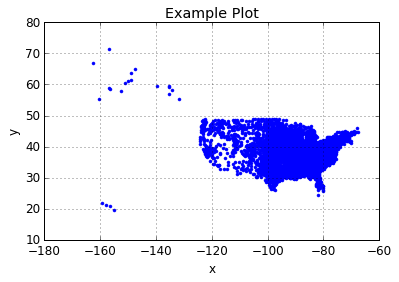

In [10]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y, '.')
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

### Playing with an API

The below tutorial is useful ...
<a href="https://realpython.com/python-api/" target="_blank">Python and APIs</a>

Also the user instructions for `requests` ...
<a href="https://docs.python-requests.org/en/master/" target="_blank">Requests: HTTP for Humans</a>


In [11]:
# An example from the tutorial

response = requests.get("https://api.thedogapi.com/")
response.text

'{"message":"The Dog API"}'

In [12]:
type(response)

requests.models.Response

In [13]:
type(response.text)

str

In [14]:
type(response.headers)

requests.structures.CaseInsensitiveDict

In [15]:
type(response.json())

dict

In [16]:
print(response.json())

{'message': 'The Dog API'}


In [17]:
# Too bad ...
print(response.csv())

AttributeError: 'Response' object has no attribute 'csv'

In [18]:
response = requests.get("https://api.thedogapi.com/v1/breeds")

In [19]:
print(len(response.text))
print()
print(response.text)

76218

[{"weight":{"imperial":"6 - 13","metric":"3 - 6"},"height":{"imperial":"9 - 11.5","metric":"23 - 29"},"id":1,"name":"Affenpinscher","bred_for":"Small rodent hunting, lapdog","breed_group":"Toy","life_span":"10 - 12 years","temperament":"Stubborn, Curious, Playful, Adventurous, Active, Fun-loving","origin":"Germany, France","reference_image_id":"BJa4kxc4X","image":{"id":"BJa4kxc4X","width":1600,"height":1199,"url":"https://cdn2.thedogapi.com/images/BJa4kxc4X.jpg"}},{"weight":{"imperial":"50 - 60","metric":"23 - 27"},"height":{"imperial":"25 - 27","metric":"64 - 69"},"id":2,"name":"Afghan Hound","country_code":"AG","bred_for":"Coursing and hunting","breed_group":"Hound","life_span":"10 - 13 years","temperament":"Aloof, Clownish, Dignified, Independent, Happy","origin":"Afghanistan, Iran, Pakistan","reference_image_id":"hMyT4CDXR","image":{"id":"hMyT4CDXR","width":606,"height":380,"url":"https://cdn2.thedogapi.com/images/hMyT4CDXR.jpg"}},{"weight":{"imperial":"44 - 66","metric":"20

In [20]:
print(response.json())

[{'weight': {'imperial': '6 - 13', 'metric': '3 - 6'}, 'height': {'imperial': '9 - 11.5', 'metric': '23 - 29'}, 'id': 1, 'name': 'Affenpinscher', 'bred_for': 'Small rodent hunting, lapdog', 'breed_group': 'Toy', 'life_span': '10 - 12 years', 'temperament': 'Stubborn, Curious, Playful, Adventurous, Active, Fun-loving', 'origin': 'Germany, France', 'reference_image_id': 'BJa4kxc4X', 'image': {'id': 'BJa4kxc4X', 'width': 1600, 'height': 1199, 'url': 'https://cdn2.thedogapi.com/images/BJa4kxc4X.jpg'}}, {'weight': {'imperial': '50 - 60', 'metric': '23 - 27'}, 'height': {'imperial': '25 - 27', 'metric': '64 - 69'}, 'id': 2, 'name': 'Afghan Hound', 'country_code': 'AG', 'bred_for': 'Coursing and hunting', 'breed_group': 'Hound', 'life_span': '10 - 13 years', 'temperament': 'Aloof, Clownish, Dignified, Independent, Happy', 'origin': 'Afghanistan, Iran, Pakistan', 'reference_image_id': 'hMyT4CDXR', 'image': {'id': 'hMyT4CDXR', 'width': 606, 'height': 380, 'url': 'https://cdn2.thedogapi.com/imag

## Another Example

In [21]:
BlahThing="E5383129-F3D7-348F-BB87-4A6EA2433E6D"

In [22]:
URL1a="http://quickstats.nass.usda.gov/api/get_counts/?key="
URL1b=BlahThing
URL1c="&commodity_desc=WHEAT&year=1959&state_alpha=CO"
URL1 = URL1a + URL1b + URL1c

In [23]:
response = requests.get(URL1)
response.text

'{"count":2946}'

In [24]:
URL2a="http://quickstats.nass.usda.gov/api/get_counts/?key="
URL2b=URL1b
URL2c="&commodity_desc=CORN&year=2015&state_alpha=IN"
URL2 = URL2a + URL2b + URL2c
response = requests.get(URL2)
response.text



'{"count":1027}'

In [25]:
URL3a="http://quickstats.nass.usda.gov/api/api_GET/?key="
URL3b=URL1b
URL3c="&commodity_desc=CORN&year=2015&state_alpha=IN&format=CSV"

URL3 = URL3a + URL3b + URL3c
response = requests.get(URL3)
response.text



'"source_desc","sector_desc","group_desc","commodity_desc","class_desc","prodn_practice_desc","util_practice_desc","statisticcat_desc","unit_desc","short_desc","domain_desc","domaincat_desc","agg_level_desc","state_ansi","state_fips_code","state_alpha","state_name","asd_code","asd_desc","county_ansi","county_code","county_name","region_desc","zip_5","watershed_code","watershed_desc","congr_district_code","country_code","country_name","location_desc","year","freq_desc","begin_code","end_code","reference_period_desc","week_ending","load_time","Value","CV (%)"\n"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN","AREA HARVESTED","ACRES","CORN, GRAIN, ORGANIC - ACRES HARVESTED","ORGANIC STATUS","ORGANIC STATUS: (NOP USDA CERTIFIED)","STATE","18","18","IN","INDIANA","","","","","","","","00000000","","","9000","UNITED STATES","INDIANA","2015","ANNUAL","00","00","YEAR","","2015-01-31 00:00:00","5,016","10.4"\n"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GR

In [26]:
print(response.text)

"source_desc","sector_desc","group_desc","commodity_desc","class_desc","prodn_practice_desc","util_practice_desc","statisticcat_desc","unit_desc","short_desc","domain_desc","domaincat_desc","agg_level_desc","state_ansi","state_fips_code","state_alpha","state_name","asd_code","asd_desc","county_ansi","county_code","county_name","region_desc","zip_5","watershed_code","watershed_desc","congr_district_code","country_code","country_name","location_desc","year","freq_desc","begin_code","end_code","reference_period_desc","week_ending","load_time","Value","CV (%)"
"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN","AREA HARVESTED","ACRES","CORN, GRAIN, ORGANIC - ACRES HARVESTED","ORGANIC STATUS","ORGANIC STATUS: (NOP USDA CERTIFIED)","STATE","18","18","IN","INDIANA","","","","","","","","00000000","","","9000","UNITED STATES","INDIANA","2015","ANNUAL","00","00","YEAR","","2015-01-31 00:00:00","5,016","10.4"
"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN

In [27]:
print(len(response.text))
print(type(response.text))

405859
<class 'str'>


In [28]:
longline = response.text;

In [29]:
fields = longline.split('\n');

In [30]:
len(fields)

1029

In [31]:
print(fields[0])

"source_desc","sector_desc","group_desc","commodity_desc","class_desc","prodn_practice_desc","util_practice_desc","statisticcat_desc","unit_desc","short_desc","domain_desc","domaincat_desc","agg_level_desc","state_ansi","state_fips_code","state_alpha","state_name","asd_code","asd_desc","county_ansi","county_code","county_name","region_desc","zip_5","watershed_code","watershed_desc","congr_district_code","country_code","country_name","location_desc","year","freq_desc","begin_code","end_code","reference_period_desc","week_ending","load_time","Value","CV (%)"


In [32]:
print(fields[1])

"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN","AREA HARVESTED","ACRES","CORN, GRAIN, ORGANIC - ACRES HARVESTED","ORGANIC STATUS","ORGANIC STATUS: (NOP USDA CERTIFIED)","STATE","18","18","IN","INDIANA","","","","","","","","00000000","","","9000","UNITED STATES","INDIANA","2015","ANNUAL","00","00","YEAR","","2015-01-31 00:00:00","5,016","10.4"


In [33]:
print(fields[2])

"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN","AREA HARVESTED","OPERATIONS","CORN, GRAIN, ORGANIC - OPERATIONS WITH AREA HARVESTED","ORGANIC STATUS","ORGANIC STATUS: (NOP USDA CERTIFIED)","STATE","18","18","IN","INDIANA","","","","","","","","00000000","","","9000","UNITED STATES","INDIANA","2015","ANNUAL","00","00","YEAR","","2015-01-31 00:00:00","218","6.1"


In [34]:
print(fields[3])

"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN","PRODUCTION","BU","CORN, GRAIN, ORGANIC - PRODUCTION, MEASURED IN BU","ORGANIC STATUS","ORGANIC STATUS: (NOP USDA CERTIFIED)","STATE","18","18","IN","INDIANA","","","","","","","","00000000","","","9000","UNITED STATES","INDIANA","2015","ANNUAL","00","00","YEAR","","2015-01-31 00:00:00","487,516","12.3"


In [35]:
print(fields[4])

"CENSUS","CROPS","FIELD CROPS","CORN","ALL CLASSES","ORGANIC","GRAIN","SALES","$","CORN, GRAIN, ORGANIC - SALES, MEASURED IN $","ORGANIC STATUS","ORGANIC STATUS: (NOP USDA CERTIFIED)","STATE","18","18","IN","INDIANA","","","","","","","","00000000","","","9000","UNITED STATES","INDIANA","2015","ANNUAL","00","00","YEAR","","2015-01-31 00:00:00","1,695,846","9.9"


In [36]:
templine = fields[4]

In [37]:
newtempline = templine.replace('","', '";"')

In [38]:
newtempline

'"CENSUS";"CROPS";"FIELD CROPS";"CORN";"ALL CLASSES";"ORGANIC";"GRAIN";"SALES";"$";"CORN, GRAIN, ORGANIC - SALES, MEASURED IN $";"ORGANIC STATUS";"ORGANIC STATUS: (NOP USDA CERTIFIED)";"STATE";"18";"18";"IN";"INDIANA";"";"";"";"";"";"";"";"00000000";"";"";"9000";"UNITED STATES";"INDIANA";"2015";"ANNUAL";"00";"00";"YEAR";"";"2015-01-31 00:00:00";"1,695,846";"9.9"'

In [39]:
newfields = newtempline.split(';')

In [40]:
newfields

['"CENSUS"',
 '"CROPS"',
 '"FIELD CROPS"',
 '"CORN"',
 '"ALL CLASSES"',
 '"ORGANIC"',
 '"GRAIN"',
 '"SALES"',
 '"$"',
 '"CORN, GRAIN, ORGANIC - SALES, MEASURED IN $"',
 '"ORGANIC STATUS"',
 '"ORGANIC STATUS: (NOP USDA CERTIFIED)"',
 '"STATE"',
 '"18"',
 '"18"',
 '"IN"',
 '"INDIANA"',
 '""',
 '""',
 '""',
 '""',
 '""',
 '""',
 '""',
 '"00000000"',
 '""',
 '""',
 '"9000"',
 '"UNITED STATES"',
 '"INDIANA"',
 '"2015"',
 '"ANNUAL"',
 '"00"',
 '"00"',
 '"YEAR"',
 '""',
 '"2015-01-31 00:00:00"',
 '"1,695,846"',
 '"9.9"']

## What now?

Now we can write code to step through this monstrosity one line at a time and parse the data to learn what are the unique values, etc. and decide how to proceed ...